In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


# EDA

In [5]:
df_train.shape

(2000, 21)

In [6]:
df_test.shape

(1000, 21)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [9]:
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [10]:
df_test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [11]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


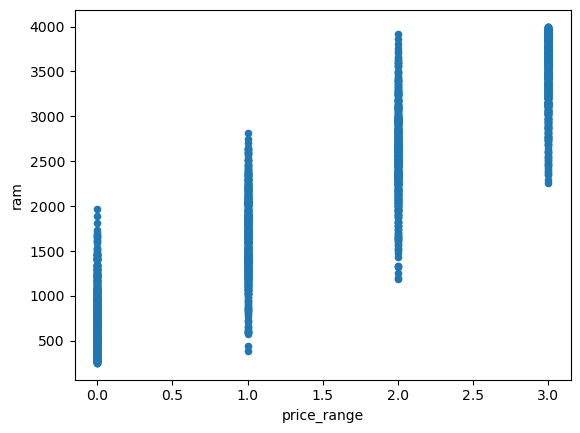

In [12]:
df_train.plot(x='price_range',y='ram',kind='scatter')
plt.show()

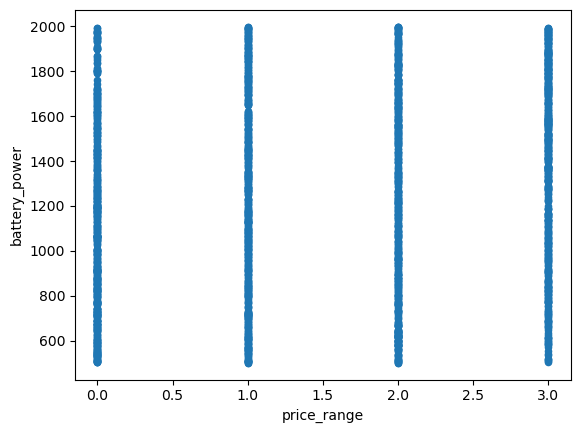

In [13]:
df_train.plot(x='price_range',y='battery_power',kind='scatter')
plt.show()

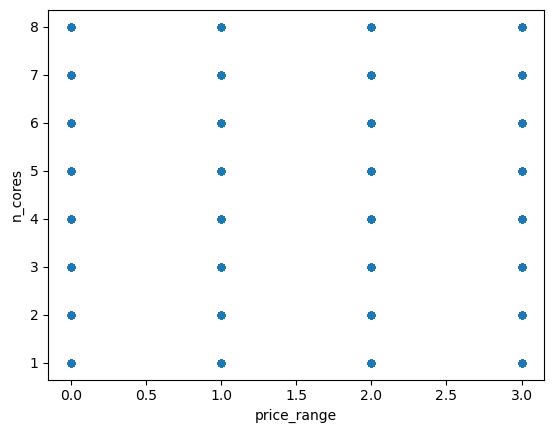

In [14]:
df_train.plot(x='price_range',y='n_cores',kind='scatter')
plt.show()

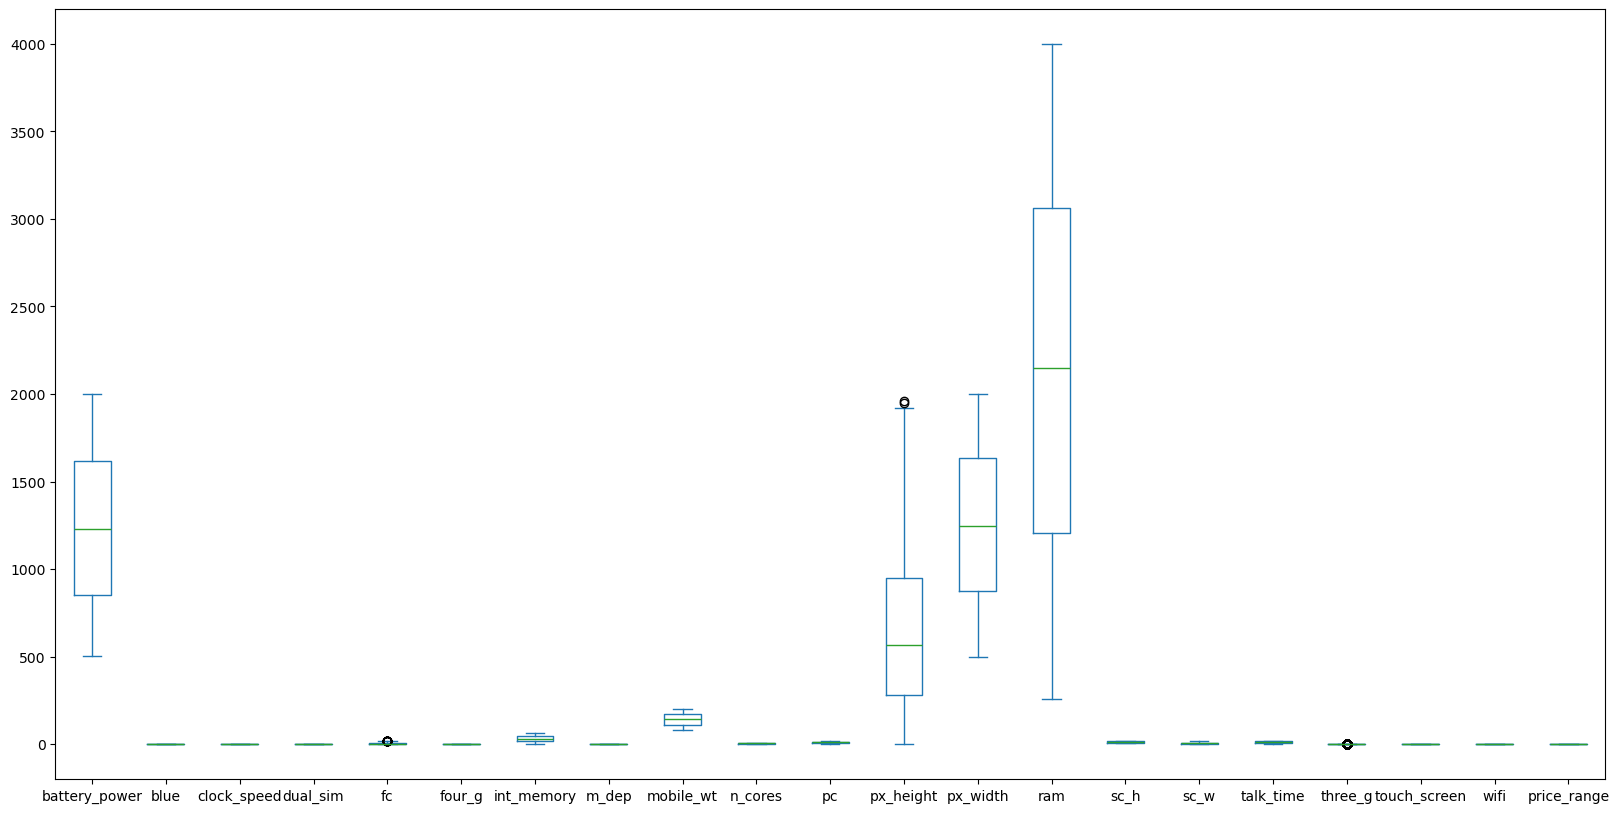

In [15]:
df_train.plot(kind='box',figsize=(20,10))
plt.show()

In [16]:
X_train = df_train.drop('price_range',axis=1)

In [17]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [18]:
X_test = df_test.drop('id',axis=1)

In [19]:
Y_train = df_train['price_range']

In [20]:
df_test.shape

(1000, 21)

# Data preprocessing

In [21]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [22]:
X_train_scaled = std.fit_transform(X_train)

In [23]:
X_test_scaled = std.transform(X_test)

# Training Model

## knn

In [24]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

In [25]:
KNN.fit(X_train_scaled,Y_train)

KNeighborsClassifier()

In [26]:
KNN_predicted = KNN.predict(X_test_scaled)

In [27]:
KNN_predicted

array([2, 3, 1, 3, 2, 1, 3, 1, 2, 0, 3, 2, 0, 1, 3, 0, 1, 1, 3, 1, 1, 3,
       0, 0, 3, 2, 1, 0, 2, 0, 2, 2, 3, 0, 1, 1, 2, 0, 3, 2, 1, 1, 0, 0,
       0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 3, 1, 2, 2, 3, 2, 1, 1, 0, 0,
       1, 1, 1, 2, 0, 1, 3, 1, 3, 0, 1, 1, 1, 2, 0, 2, 3, 1, 2, 0, 2, 1,
       1, 1, 2, 3, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 3, 1, 2, 1, 1, 2, 2,
       3, 0, 1, 3, 3, 2, 3, 2, 2, 2, 0, 3, 3, 2, 1, 1, 2, 2, 2, 2, 0, 1,
       1, 1, 3, 2, 2, 0, 3, 2, 0, 2, 1, 3, 3, 2, 2, 2, 2, 1, 3, 1, 1, 2,
       1, 1, 3, 3, 2, 0, 2, 2, 2, 3, 3, 3, 0, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       2, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 3, 0, 1, 2, 2,
       1, 2, 0, 1, 2, 1, 2, 0, 2, 1, 0, 0, 1, 2, 0, 3, 3, 2, 0, 2, 0, 3,
       1, 0, 3, 1, 0, 2, 0, 1, 0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 3, 0, 2, 0,
       0, 2, 1, 2, 3, 2, 1, 1, 2, 0, 0, 2, 2, 3, 0, 3, 3, 1, 3, 1, 0, 2,
       2, 3, 3, 0, 0, 0, 2, 3, 1, 0, 3, 2, 0, 3, 0, 2, 1, 0, 0, 3, 2, 3,
       2, 1, 1, 2, 3, 0, 3, 1, 2, 0, 1, 0, 1, 2, 1,

## Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [29]:
dtc.fit(X_train_scaled,Y_train)


DecisionTreeClassifier()

In [30]:
dtc_predicted = dtc.predict(X_test_scaled)


In [31]:
dtc_predicted

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 1, 2, 0, 3, 2, 0, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 1, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 2, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 2, 3, 3, 0, 2, 1, 2, 3, 1, 3, 3, 0, 3, 0, 3, 0,
       3, 0, 1, 2, 2, 0, 2, 1, 0, 2, 0, 3, 1, 0, 0, 3, 1, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 3, 3, 2, 0, 2,
       1, 0, 3, 0, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 0, 0, 2,
       1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 1, 2, 2,
       2, 2, 1, 2, 3, 3, 3, 2, 2, 0, 0, 0, 1, 2, 0, 2, 3, 3, 1, 2, 0, 3,
       2, 2, 3, 1, 0, 1, 1, 3, 0, 1, 0, 2, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 0, 2, 2, 1, 2,
       3, 3, 3, 1, 1, 0, 2, 2, 2, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 3, 1, 3, 3, 2, 3, 2, 2, 1, 2, 0, 2, 3, 1,

##  Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
lrn=LogisticRegression()

In [33]:
lrn.fit(X_train_scaled,Y_train)

LogisticRegression()

In [34]:
lrn_predicted = lrn.predict(X_test_scaled)

In [35]:
lrn_predicted

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 2, 3, 2, 2, 1, 0, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 3, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

# Model Evaluation

### As anticipated from our Test Data csv, we cannot generate an accuracy score plot since we lack the target variable. Therefore, we'll rely solely on Train.csv, splitting it into training and testing sets.

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,Y_train,Y_test = train_test_split(X_train_scaled,Y_train,test_size=0.2,random_state=42)

In [38]:
X_train

array([[ 1.55808903, -0.9900495 , -1.2530642 , ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.37834511,  1.0100505 ,  0.83077942, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-0.00573288, -0.9900495 , -0.76274805, ...,  0.55964063,
        -1.00601811,  0.98609664],
       ...,
       [ 1.34411631,  1.0100505 , -1.2530642 , ...,  0.55964063,
        -1.00601811,  0.98609664],
       [ 1.56719425, -0.9900495 , -0.76274805, ..., -1.78686097,
         0.99401789,  0.98609664],
       [-1.3737925 ,  1.0100505 , -1.13048516, ...,  0.55964063,
        -1.00601811, -1.01409939]])

In [39]:
Y_train

968     1
240     2
819     0
692     3
420     1
       ..
1130    3
1294    0
860     2
1459    3
1126    1
Name: price_range, Length: 1600, dtype: int64

In [40]:
X_test

array([[ 0.92755239, -0.9900495 ,  1.19851653, ...,  0.55964063,
         0.99401789, -1.01409939],
       [-0.12865337, -0.9900495 , -1.2530642 , ...,  0.55964063,
        -1.00601811, -1.01409939],
       [ 1.669628  , -0.9900495 ,  1.68883267, ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [-0.44278354, -0.9900495 ,  0.34046327, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.16209609, -0.9900495 ,  1.4436746 , ...,  0.55964063,
         0.99401789,  0.98609664],
       [-0.12182446, -0.9900495 ,  0.46304231, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [41]:
Y_test

1860    0
353     2
1333    1
905     3
1289    1
       ..
965     3
1284    2
1739    1
261     1
535     2
Name: price_range, Length: 400, dtype: int64

# Decision Tree

In [42]:
dtc.fit(X_train,Y_train)


DecisionTreeClassifier()

In [43]:
Y_prediction = dtc.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
dtc_acc = accuracy_score(Y_test,Y_prediction)

In [46]:
dtc_acc

0.845

# KNN

In [47]:
KNN.fit(X_train,Y_train)

KNeighborsClassifier()

In [48]:
Y_prediction = KNN.predict(X_test)

In [49]:
Y_prediction

array([0, 1, 0, 2, 0, 1, 1, 0, 3, 1, 0, 1, 1, 3, 2, 3, 3, 3, 0, 0, 0, 1,
       0, 1, 0, 1, 3, 2, 1, 0, 2, 0, 2, 1, 2, 3, 2, 0, 3, 0, 0, 2, 3, 0,
       2, 0, 1, 2, 3, 0, 1, 2, 1, 0, 1, 2, 3, 2, 0, 0, 0, 2, 2, 2, 0, 1,
       2, 3, 2, 3, 1, 3, 0, 2, 2, 1, 0, 3, 2, 1, 3, 0, 1, 0, 0, 3, 1, 3,
       3, 0, 3, 3, 2, 2, 3, 1, 1, 3, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 2, 1,
       0, 1, 2, 2, 1, 2, 3, 2, 0, 2, 1, 1, 3, 1, 3, 1, 0, 2, 1, 2, 2, 0,
       1, 2, 1, 3, 1, 1, 0, 2, 3, 1, 3, 2, 1, 0, 2, 0, 2, 2, 3, 0, 1, 0,
       3, 3, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 0, 1, 1, 2, 0,
       0, 2, 1, 0, 0, 0, 2, 0, 1, 3, 2, 3, 0, 0, 1, 1, 1, 3, 3, 2, 1, 0,
       1, 0, 0, 1, 1, 3, 2, 1, 0, 2, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 1,
       2, 1, 2, 0, 0, 2, 2, 3, 0, 1, 1, 0, 2, 3, 2, 0, 0, 3, 2, 0, 1, 2,
       1, 3, 0, 2, 1, 1, 2, 1, 1, 3, 1, 3, 3, 2, 3, 2, 2, 2, 3, 0, 3, 1,
       1, 2, 2, 0, 1, 3, 1, 1, 1, 2, 0, 1, 1, 3, 2, 1, 2, 1, 0, 3, 1, 2,
       1, 0, 1, 0, 2, 1, 2, 2, 0, 1, 1, 0, 0, 3, 3,

In [50]:
knn_ac=accuracy_score(Y_test,Y_prediction)

In [51]:
knn_ac

0.53

# Logistic Regression

In [52]:
lrn.fit(X_train,Y_train)

LogisticRegression()

In [53]:
Y_prediction = lrn.predict(X_test)


In [54]:
Y_prediction

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 3, 2, 3, 3, 1, 0, 0, 2,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 2, 2, 1, 3, 1, 3, 1, 0, 0, 1, 1, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 3, 1, 3, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 3, 3, 1, 0, 1, 2, 2, 3, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 0, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 3, 0, 2, 3, 2, 2, 2, 1, 0, 2, 0, 3, 3, 1, 3, 1, 1, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [55]:
lrn_ac=accuracy_score(Y_test,Y_prediction)

In [56]:
lrn_ac

0.9775

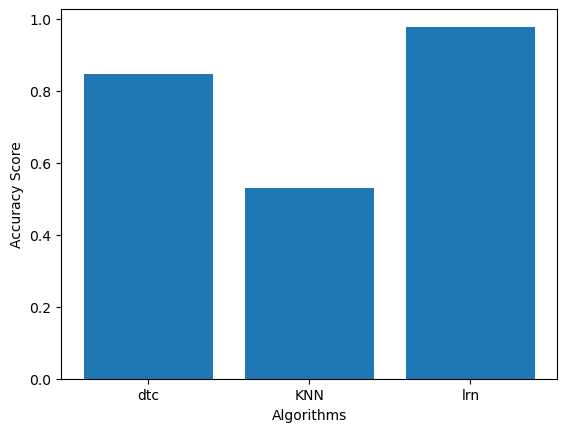

In [57]:
plt.bar(x=['dtc','KNN','lrn'],height=[dtc_acc,knn_ac,lrn_ac])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.show()

# Fine tuning model and cross validation

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000) 

param_grid = {
    'penalty': [ 'l2'],          
    'C': [0.001, 0.01, 0.1, 1, 10, 100] 
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, Y_train)

best_params = grid_search.best_params_

best_model = LogisticRegression(**best_params, max_iter=1000)
best_model.fit(X_train_scaled, Y_train)

y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.975


In [59]:
best_params

{'C': 100, 'penalty': 'l2'}

# Conclusion

Logistic Regression: With an accuracy score of 0.9775, logistic regression outperformed both decision tree and KNN models. This indicates that logistic regression was highly effective in classifying the data points correctly.

Decision Tree: Although decision tree achieved a respectable accuracy score of 0.8225, it fell short compared to logistic regression. However, it still performed reasonably well in classifying the data.

KNN (K-Nearest Neighbors): KNN yielded the lowest accuracy score of 0.53 among the three models. This suggests that KNN might not have been the best choice for this particular dataset, as it struggled to effectively classify the data points.